In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
model = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
movenet = model.signatures['serving_default']

In [254]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}


def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)
            
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

In [255]:
#setting input shape statically by fixing it to 192,192 - by importing model

def pose_estimation(frame):
    img = frame.copy()
    img = tf.image.resize(tf.expand_dims(img, axis=0), (192,192))  # Ensure the image is resized properly
    img = tf.cast(img, dtype=tf.int32)  # Ensure data type matches model requirements
    img = tf.expand_dims(img, axis=0)  # Add batch dimension

    start_time = time.time()
    results = movenet(img)
    elapsed_time = time.time() - start_time
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((1,1,17,3))
    print(keypoints_with_scores)
    
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.2)
    
    elapsed_time_ms = elapsed_time * 1000
    cv2.putText(frame,'%.2fms' % elapsed_time_ms, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 2)
    
    return frame


(800, 800, 3)


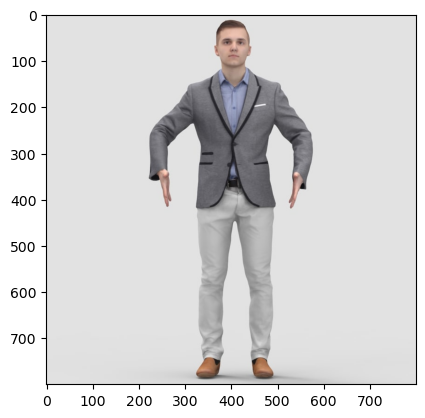

In [256]:
non_biker1=cv2.imread("C:/Users/VE00YM828/Desktop/Openpose/img.jpg")
print(non_biker1.shape)
plt.imshow(cv2.cvtColor(non_biker1,cv2.COLOR_BGR2RGB))

[[[[0.09463223 0.50631905 0.8301898 ]
   [0.07901004 0.5247748  0.79834574]
   [0.07871295 0.488194   0.8425445 ]
   [0.09378561 0.5500729  0.8653154 ]
   [0.09956937 0.4611289  0.7710686 ]
   [0.2016648  0.6102388  0.9359116 ]
   [0.20519839 0.40705222 0.905392  ]
   [0.3224966  0.6849985  0.87427694]
   [0.31401807 0.31810278 0.8415337 ]
   [0.42664117 0.6953889  0.75323856]
   [0.42186588 0.30305314 0.6687351 ]
   [0.47334313 0.5650038  0.8995226 ]
   [0.47379565 0.4544376  0.8692337 ]
   [0.70310897 0.57686436 0.9125653 ]
   [0.7047118  0.45013916 0.93224275]
   [0.9105329  0.5771377  0.9158248 ]
   [0.90278244 0.443694   0.8348186 ]]]]


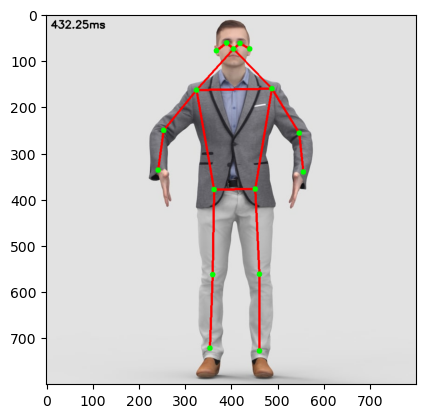

In [257]:
plt.imshow(cv2.cvtColor(pose_estimation(non_biker1),cv2.COLOR_BGR2RGB))

(613, 700, 3)


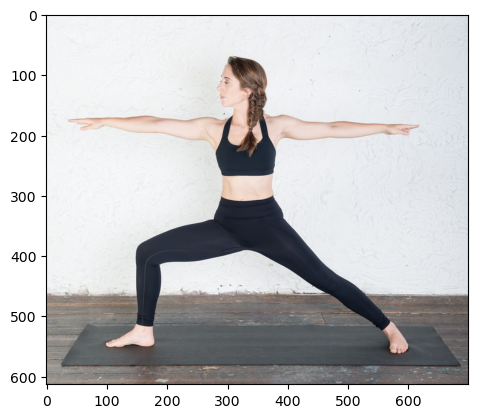

In [206]:
non_biker2=cv2.imread("C:/Users/VE00YM828/Desktop/Openpose/wrong.png")
print(non_biker2.shape)
plt.imshow(cv2.cvtColor(non_biker2,cv2.COLOR_BGR2RGB))

[[[[0.19599774 0.4048255  0.58071226]
   [0.17655182 0.41698384 0.59179807]
   [0.17858258 0.41114277 0.34438092]
   [0.19301324 0.4725355  0.63398385]
   [0.18657342 0.44720933 0.35469958]
   [0.3101186  0.5476291  0.80762976]
   [0.30287534 0.3921121  0.6928014 ]
   [0.30818492 0.67717874 0.42298594]
   [0.29686585 0.26076    0.6355393 ]
   [0.31619108 0.81167066 0.46800143]
   [0.29428008 0.14118075 0.38979977]
   [0.56784344 0.5128088  0.79998225]
   [0.5649401  0.41655084 0.73190147]
   [0.72000206 0.6562263  0.790524  ]
   [0.6372596  0.24124245 0.8265644 ]
   [0.8544733  0.8041255  0.83614326]
   [0.85337436 0.23576775 0.78037846]]]]


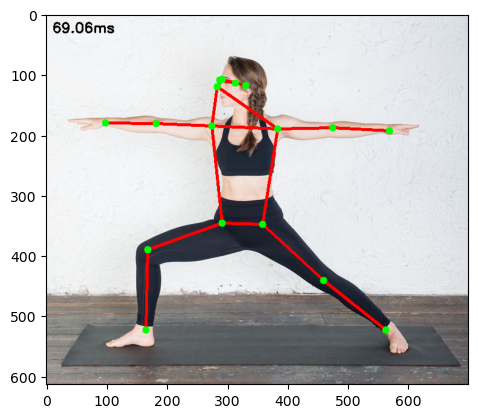

In [207]:
plt.imshow(cv2.cvtColor(pose_estimation(non_biker2),cv2.COLOR_BGR2RGB))

(315, 474, 3)


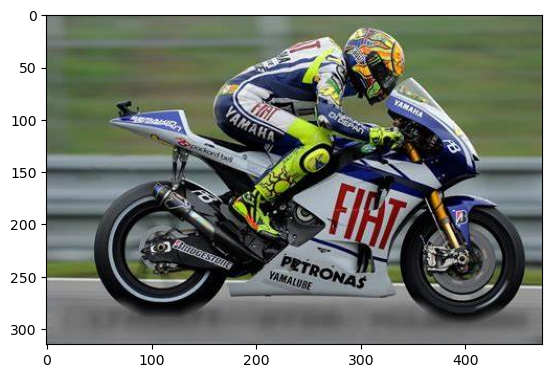

In [208]:
biker1= cv2.imread("img2.jfif")
print(biker1.shape)
plt.imshow(cv2.cvtColor(biker1,cv2.COLOR_BGR2RGB))

[[[[0.18176946 0.66675293 0.4443379 ]
   [0.17101952 0.6811526  0.35106876]
   [0.15971564 0.657858   0.32946265]
   [0.15523446 0.6795683  0.25655627]
   [0.12863082 0.6247696  0.42930457]
   [0.18809919 0.6491425  0.36724406]
   [0.12773955 0.5472488  0.57677835]
   [0.26908726 0.6966827  0.39337867]
   [0.25146198 0.55451626 0.365551  ]
   [0.34996423 0.7826524  0.21254906]
   [0.3081752  0.58686054 0.25527674]
   [0.28812847 0.46331894 0.50617725]
   [0.2678764  0.39306498 0.5851461 ]
   [0.40562057 0.5741179  0.2700088 ]
   [0.397166   0.53595865 0.6428662 ]
   [0.6410186  0.49350184 0.05174344]
   [0.5810517  0.39515457 0.5300355 ]]]]


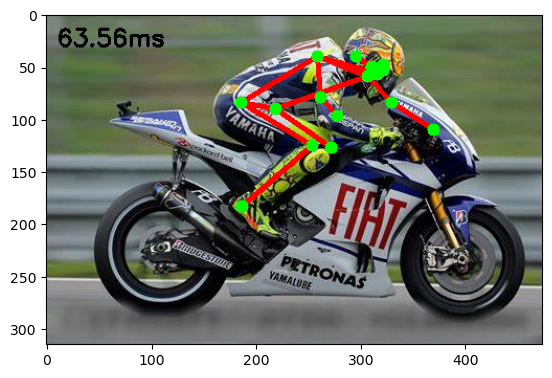

In [209]:
plt.imshow(cv2.cvtColor(pose_estimation(biker1),cv2.COLOR_BGR2RGB))

(432, 770, 3)


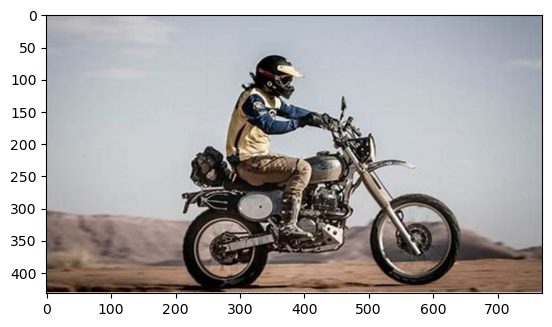

In [210]:
biker2=cv2.imread("C:/Users/VE00YM828/Desktop/Openpose/img_biker.jfif")
print(biker2.shape)
plt.imshow(cv2.cvtColor(biker2,cv2.COLOR_BGR2RGB))

[[[[0.22671956 0.49738094 0.37325236]
   [0.21853137 0.49277005 0.36558506]
   [0.21709144 0.48542327 0.40377477]
   [0.22428301 0.48097047 0.31318355]
   [0.21616493 0.44947025 0.48231837]
   [0.29990482 0.47418842 0.2700048 ]
   [0.28088418 0.41635776 0.5277597 ]
   [0.3823824  0.4939328  0.2568241 ]
   [0.37737674 0.45289654 0.33019072]
   [0.38239425 0.5546625  0.3426698 ]
   [0.37505922 0.5191497  0.32838112]
   [0.4915985  0.4488886  0.41199413]
   [0.48935792 0.40736395 0.41260594]
   [0.5697193  0.52618307 0.205004  ]
   [0.55434734 0.49559045 0.33407888]
   [0.7387826  0.5135532  0.26607847]
   [0.73416936 0.45230898 0.1934376 ]]]]


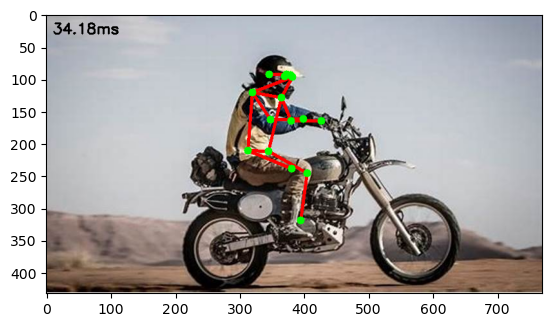

In [211]:
plt.imshow(cv2.cvtColor(pose_estimation(biker2),cv2.COLOR_BGR2RGB))

(675, 1200, 3)


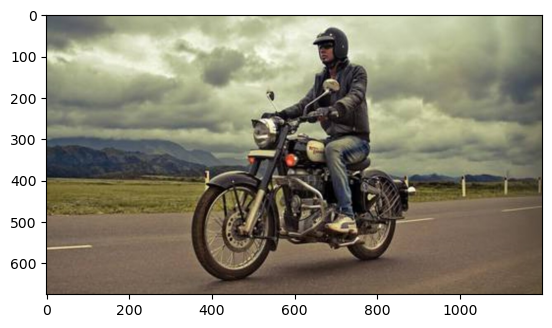

In [212]:
biker3=cv2.imread("C:/Users/VE00YM828/Desktop/Openpose/rider3.jpg")
print(biker3.shape)
plt.imshow(cv2.cvtColor(biker3,cv2.COLOR_BGR2RGB))

[[[[0.12562525 0.5645696  0.31816474]
   [0.11053419 0.56654423 0.5344752 ]
   [0.11321115 0.556813   0.4152075 ]
   [0.11796548 0.5846352  0.4295674 ]
   [0.11909395 0.55372    0.37301007]
   [0.20283173 0.6193445  0.31593066]
   [0.207708   0.5657434  0.35931996]
   [0.31901813 0.61402047 0.31438386]
   [0.31021303 0.5324677  0.2854772 ]
   [0.3408556  0.5520003  0.18275665]
   [0.3441518  0.49130064 0.22475106]
   [0.41160795 0.6224991  0.3264046 ]
   [0.41248834 0.57379735 0.34697336]
   [0.5471624  0.6117238  0.2926185 ]
   [0.5326117  0.542768   0.14784321]
   [0.713315   0.6506535  0.24603541]
   [0.70340097 0.58869183 0.15013011]]]]


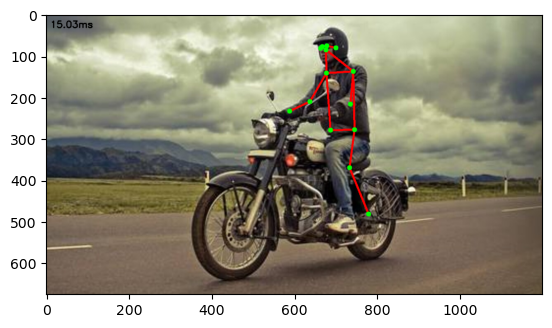

In [213]:
plt.imshow(cv2.cvtColor(pose_estimation(biker3),cv2.COLOR_BGR2RGB))

In [154]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped =np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 6, (0,255,0), -1)

In [155]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
} 

In [156]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 4)

In [ ]:
right_eye=keypoints_with_scores[0][0][2]         #normalized coordiantes of right eye with confidence

In [9]:
#actual pixel realtive coordinates of right eye in input image
np.array(right_eye[:2]*(img.shape[0],img.shape[1])).astype(int)

array([ 0, 97])

In [110]:
#webcam capture
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    
    #resize image
    img = frame.copy()
    img= tf.image.resize(tf.expand_dims(img, axis=0), (192,192))     #image size should be multiple of 32
    input_img=tf.cast(img,dtype=tf.float32)
    
    #setup input and output
    input_details=interpreter.get_input_details()
    output_details=interpreter.get_output_details()
    
    #make predictions
    #measure inference time
    interpreter.set_tensor(input_details[0]['index'],np.array(input_img))
    start_time = time.time()
    interpreter.invoke()
    elapsed_time = time.time() - start_time
    keypoints_with_scores=interpreter.get_tensor(output_details[0]['index'])
    
    # Rendering keypoints
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    # Convert elapsed time to milliseconds
    elapsed_time_ms = elapsed_time * 1000
    
    # Display the timing on the frame
    cv2.putText(frame, 'Inference time: %.2fms' % elapsed_time_ms, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    
    cv2.imshow('Movenet Multipose',frame)
    
    if cv2.waitKey(10) & 0xFF==ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
# Initialize the TFLite interpreter - it acts as our model
model_path = "3.tflite"
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [49]:
#setting input shape statically by fixing it to 192,192 - using tflite

def pose_estimation1(frame):
    img = frame.copy()
    img = tf.image.resize(tf.expand_dims(img, axis=0), (192,192))   #image size should be multiple of 32
    input_img=tf.cast(img,dtype=tf.float32)
    
    #setup input and output
    input_details=interpreter.get_input_details()
    output_details=interpreter.get_output_details()
    
    #make predictions
    #measure inference time
    interpreter.set_tensor(input_details[0]['index'],np.array(input_img))
    start_time = time.time()
    interpreter.invoke()
    keypoints_with_scores=interpreter.get_tensor(output_details[0]['index'])
    elapsed_time = time.time() - start_time
    keypoints_with_scores=interpreter.get_tensor(output_details[0]['index'])
    
    # Rendering keypoints
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    # Convert elapsed time to milliseconds
    elapsed_time_ms = elapsed_time * 1000
    
    # Display the timing on the frame
    cv2.putText(frame, 'Inference time: %.2fms' % elapsed_time_ms, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0))
    
    return frame